In [2]:
# TODOs
# 1. Scale features.
# 2. Add dropped columns with OHE or feature hashing.
# 3. Understand how the model fits under the hood.
# 4. Adv: Name has salutation: It can be used to determine a new feature of married / unmarried / eduction level etc.

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
%matplotlib inline

In [4]:
# Step 1: Read test and train data
testDataLoc  = 'D:/Data/Titanic/test.csv'
trainDataLoc = 'D:/Data/Titanic/train.csv'
rawTrainData = pd.read_csv(trainDataLoc)
rawTestData = pd.read_csv(testDataLoc)

In [5]:
rawTrainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
reqCols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [7]:
# Step 2: Clean the raw input data
def parse_data(rawdf):
    # Step 1: Remove unwanted columns
    df = rawdf[reqCols]
    
    # Step 2: Convert Sex to binary values.
    def parse_sex(val):
        if val.lower() == 'male':
            return 1.0
        else:
            return 0.0
        
    df['Sex'] = df['Sex'].apply(parse_sex)
    
    # TODO Step 3: Parse cabin values
    def parse_cabin(val):
        pass
    
    # Step 4: Fill NaN values in age
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    
    # Step 5: Do same for fare
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    
    return df

In [8]:
trainDF = parse_data(rawTrainData)
labels = rawTrainData['Survived']
testDF  = parse_data(rawTestData)

C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
trainDF.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1.0,22.0,1,0,7.2500
1,1,0.0,38.0,1,0,71.2833
2,3,0.0,26.0,0,0,7.9250
3,1,0.0,35.0,1,0,53.1000
4,3,1.0,35.0,0,0,8.0500


In [10]:
trainDF.count()

Pclass    891
Sex       891
Age       891
SibSp     891
Parch     891
Fare      891
dtype: int64

In [11]:
# Step 3: ML processing
from sklearn.linear_model import LogisticRegression

In [12]:
# Fit data to model
model = LogisticRegression()
model.fit(trainDF.values, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
def accuracy(res, label):
    rlen = len(res)
    llen = len(label)
    count = 0
    
    if rlen == llen:
        for i in range(rlen):
            if res[i] == label[i]:
                count += 1
                
        return float(count/rlen)
    else:
        print ('Invalid res and labels')
        return -1

In [14]:
accuracy(model.predict(trainDF.values), labels)

0.7991021324354658

In [15]:
rawTestData.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [16]:
model.predict(testDF.values[0:5, :])

array([0, 0, 0, 0, 1], dtype=int64)

In [17]:
from sklearn import svm

In [18]:
svm_model = svm.SVC(max_iter=250)

In [19]:
svm_model.fit(trainDF.values, labels)

C:\Miniconda3\lib\site-packages\sklearn\svm\base.py:224: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=250, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
accuracy(svm_model.predict(trainDF.values), labels)

0.9034792368125701

In [117]:
def plot_res(res):
    plt.figure()
    plt.hist(res, bins=4, align='mid', color='g')
    plt.xticks([-1,0,1,2])
    plt.show()

In [21]:
res = svm_model.predict(testDF.values)

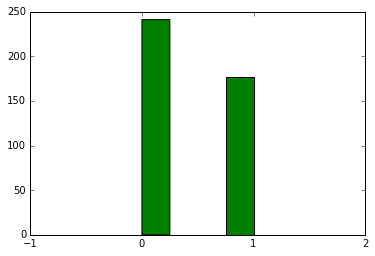

In [118]:
plot_res(res)

In [23]:
resDF = pd.DataFrame({ 'PassengerId' : rawTestData['PassengerId'], 
                      'Survived': res})

In [24]:
resDF.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [25]:
resDF.to_csv('D:/Data/Titanic/result.csv', index=False)

In [26]:
print ('Current accuracy on test set: ', 62.201)

Current accuracy on test set:  62.201


In [28]:
from sklearn import preprocessing

In [30]:
# Iteration 2: 
# 1. Scale features.
std_scale = preprocessing.StandardScaler().fit(trainDF)

def scale_features(df):
    return std_scale.transform(df)

In [31]:
std_trainDF = scale_features(trainDF)
std_testDF = scale_features(testDF)

In [69]:
std_trainDF[0:5, :]

array([[ 0.82737724,  0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693, -1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426],
       [-1.56610693, -1.35557354,  0.40792596,  0.43279337, -0.47367361,
         0.42073024],
       [ 0.82737724,  0.73769513,  0.40792596, -0.4745452 , -0.47367361,
        -0.48633742]])

In [70]:
trainDF.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1.0,22.0,1,0,7.2500
1,1,0.0,38.0,1,0,71.2833
2,3,0.0,26.0,0,0,7.9250
3,1,0.0,35.0,1,0,53.1000
4,3,1.0,35.0,0,0,8.0500


In [46]:
# Fit new standardized data
std_svm_model = svm.SVC(max_iter=1000)
std_svm_model.fit(std_trainDF, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
accuracy(std_svm_model.predict(std_trainDF), labels)

0.8361391694725028

In [49]:
res_std = std_svm_model.predict(std_testDF)

In [50]:
std_resDF = pd.DataFrame({ 'PassengerId' : rawTestData['PassengerId'], 
                      'Survived': res_std})

In [52]:
std_resDF.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [53]:
resDF.to_csv('D:/Data/Titanic/result_std.csv', index=False)

In [57]:
# Standardized Logistic regression models
std_lr_model = LogisticRegression(max_iter=1000)
std_lr_model.fit(std_trainDF, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
accuracy(std_lr_model.predict(std_trainDF), labels)

0.7968574635241302

In [71]:
# Now with min-max scaling
mm_scale = preprocessing.MinMaxScaler().fit(trainDF)

def scale_features_mm(df):
    return mm_scale.transform(df)

In [72]:
mm_trainDF = scale_features_mm(trainDF)
mm_testDF = scale_features_mm(testDF)

In [73]:
mm_trainDF[0:5, :]

array([[ 1.        ,  1.        ,  0.27117366,  0.125     ,  0.        ,
         0.01415106],
       [ 0.        ,  0.        ,  0.4722292 ,  0.125     ,  0.        ,
         0.13913574],
       [ 1.        ,  0.        ,  0.32143755,  0.        ,  0.        ,
         0.01546857],
       [ 0.        ,  0.        ,  0.43453129,  0.125     ,  0.        ,
         0.1036443 ],
       [ 1.        ,  1.        ,  0.43453129,  0.        ,  0.        ,
         0.01571255]])

In [74]:
# Fit new standardized data
mm_svm_model = svm.SVC(max_iter=1000)
mm_svm_model.fit(mm_trainDF, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
accuracy(std_svm_model.predict(std_trainDF), labels)

0.8361391694725028

In [76]:
res_mm = mm_svm_model.predict(mm_testDF)

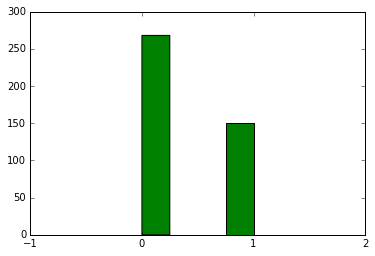

In [119]:
plot_res(res_mm)

In [77]:
mm_resDF = pd.DataFrame({ 'PassengerId' : rawTestData['PassengerId'], 
                      'Survived': res_mm})

In [78]:
mm_resDF.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [79]:
mm_resDF.to_csv('D:/Data/Titanic/result_mm.csv', index=False)

In [82]:
print ('New Accuracy with Min-Max scaling: ', 77.033)

New Accuracy with Min-Max scaling:  77.033


In [127]:
rawTrainData.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
# Up next: Feature hashing: Add back removed features.
# Now it's time to get back those categorical features ignored in the beginning.
# Start with name variable. 
# From the name, determine the maritial status of the person, as a category (No ordinal values).
import re
p = re.compile(r'^(\w+\,)\s+([M|C|D][a-z]+)(\.\s+)')    

In [152]:
def whats_in_name(name):
    res = p.match(name)
    if res:
        return res.group(2)
    else:
        return ''

In [153]:
name = 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
print (whats_in_name(name))

Mrs


In [157]:
trainDF['Name'] = rawTrainData['Name']

C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [158]:
trainDF.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Name
0,3,1.0,22.0,1,0,7.2500,"Braund, Mr. Owen Harris"
1,1,0.0,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,0.0,26.0,0,0,7.9250,"Heikkinen, Miss. Laina"
3,1,0.0,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,1.0,35.0,0,0,8.0500,"Allen, Mr. William Henry"


In [159]:
trainDF['Name'] = trainDF['Name'].apply(whats_in_name)

C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [175]:
trainDF.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Name
0,3,1.0,22.0,1,0,7.2500,Mr
1,1,0.0,38.0,1,0,71.2833,Mrs
2,3,0.0,26.0,0,0,7.9250,Miss
3,1,0.0,35.0,1,0,53.1000,Mrs
4,3,1.0,35.0,0,0,8.0500,Mr


In [161]:
trainDF['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', '', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Mlle', 'Col', 'Capt'], dtype=object)

In [201]:
def list_to_counts(values):
    res = {}
    sals = []
    counts = []
    for val in values:
        if val in res:
            res[val] += 1
        else:
            res[val] = 1
    for key, val in res.items():
        sals.append(key)
        counts.append(val)
    return (sals, counts)

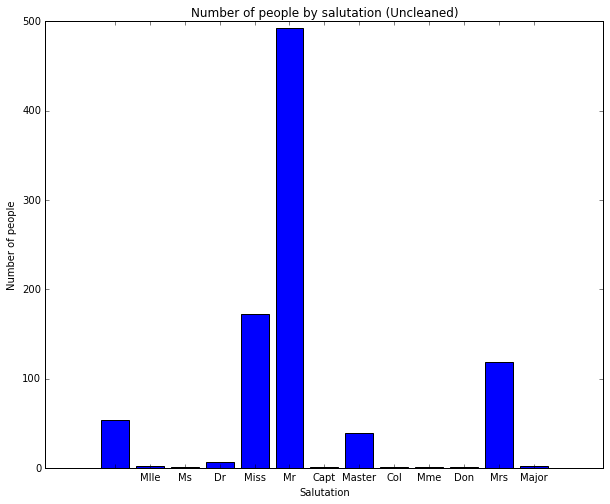

In [217]:
# Let's see how people are distributed
plt.figure(figsize=(10, 8))
x = range(len(sals))
plt.bar(x, counts, align='center')
plt.xticks(x, sals)
plt.title('Number of people by salutation (Uncleaned)')
plt.xlabel('Salutation')
plt.ylabel('Number of people')
plt.show()